# Chapter 1 - Introduction

In [1]:
import sys
if 'google.colab' in sys.modules:
    !git clone https://github.com/jtooates/mlnb_public.git &> /dev/null
    !mv mlnb_public/* . &> /dev/null

In [1]:
%run Mushrooms.ipynb
import json
import pandas as pd

This book has two goals.  The first is to provide an accessible and rigorous introduction to the fundamentals of machine learning, with equal emphasis on both accessibility and rigor.  Machine learning is an exciting field that is impacting people's lives in sometimes profound ways.  It's important that the field's promise and pitfalls be well and deeply understood by those who take an interest.  The second goal of this book is to be interactive and promote learning through experimentation - thus the use of Python notebooks.  Scattered throughout the text is code, some of which generates graphs and tables.  There is code that constitutes bare bones but highly understandable implementations of common machine learning algorithms, and there is code that demonstrates machine learning concepts that stand apart from specific algorithms.  Feel free to tinker with all of it, trying different inputs or even modifying the code to see what happens.  Sometimes there will be ideas for things to try within the text, but surely other ideas will come to mind that are fun and informative to explore.  The science and practice of machine learning are like any other human activities, you get better with experience.  The same could be said of machines.  Mitchell defined the field of machine learning as building "computer programs that automatically improve with experience" <a href="#Mitchell1997">(Mitchell, 1997)</a>.

This chapter explores some fundamental concepts in and about machine learning, including what machine learning is and how machines can be made to learn, starting with a thought experiment.  As the experiment progresses the discussion will become more general and less grounded in a specific scenario.

## 1.1 Mushrooms, Goats, and Machine Learning

Imagine that you own a restaurant at the foot of the Italian Alps.<sup><a href="#fn1">1</a></sup>  Behind the restaurant is a field with a herd of goats, and beyond that is a forest where you pick wild mushrooms.  The mushrooms are featured in a number of popular dishes, but occasionally you pick ones that are poisonous and your customers get sick.  Business is hurting and something has to be done.  Inspiration finally comes in the form of a goat's bleat.  You can feed one mushroom from each batch to a goat.  If the goat dies you throw them out.  If the goat lives they wind up in a signature dish.  Business is booming again, but after a few months you realize the fatal flaw with this plan.  You're about to run out of goats!  What to do?

You sit and stare at a box of mushrooms, one from each batch you've tested with the goats, labeled with whether the mushroom was poisonous or edible, i.e., whether the goat lived or died.  It looks like this.

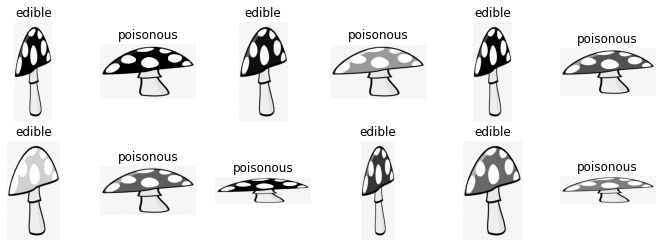

In [2]:
training_set = json.loads(open('chapter_1_mushroom_dataset.json').read())
show_mushrooms(training_set, 6)

The mushrooms have different sizes.  Some are tall and thin, others are short and wide.  Though the stems all have the same color, some caps are darker shades than others.  Spend a few minutes to see if there is any pattern.  Are there any observable features that would allow you to figure out or predict whether a new mushroom, without the label, is poisonous or edible?  Finding such a pattern would make it possible to avoid picking poisonous mushrooms in the first place and obviate the need for the goat test.  In machine learning terms, you're trying to solve a **binary classification problem using a training set of instances**.  That's a lot of new terminolgy, but the concepts are easy to understand given our thought experiment.  

Each mushroom/label pair above is an **instance**, comprising an object (mushroom) and the true value of the thing we'd like to predict (whether it is poisonous or edible).  A collection of instances is called a **training set** when it will be used to train or teach a machine learning system to make accurate predictions.  Other domains will have other kinds of instances, such as patients and whether they have the flu, or loan applicants and whether they are a good credit risk, or emails and whether they are spam. These are all **binary classification** problems because the goal is to predict one of two labels, which are often and interchangeably called _classes_ or _class labels_.  More generally, if the thing we're trying to predict is drawn from a (typically) small set of discrete values, it's called **classification**.  It's possible to have more than two class, in which case the task is called **multi-class classification**.  One example is automated phone help systems that try to determine which of the ten digits you said after being told to "listen carefully to all options, as our menu has recently changed."  A common alternative to classification is **regression**, where the goal is to predict a real number, such as the toxicity of a mushroom between 0.0 (perfectly fine) and 1.0 (instant death) or the cost of a ticket for a particular flight next month.

Let's return to the task at hand, which is to see if the training set above offers any clues to recognizing poisonous mushrooms.  It might be easier if we grouped together mushrooms in the same class, as shown below.  

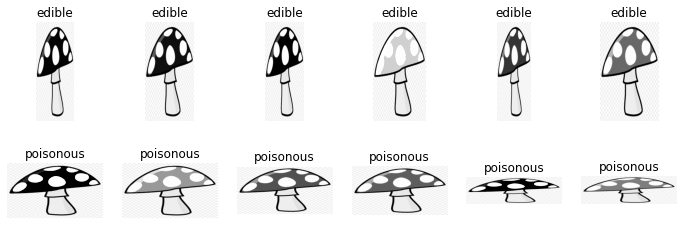

In [3]:
training_set.sort(key = lambda mushroom: mushroom['label'])
show_mushrooms(training_set, 6)

It appears that the edible mushrooms in the first row are taller and thinner than the poisonous mushrooms in the second row.  It's less clear whether the cap color is useful in telling the two kinds of mushrooms apart.  Given this new insight from the training data, which of the  two mushrooms shown below would you eat?  This is called a **test set** because it contains instances that are not in the training set and the true labels are hidden but knowable, so we can test the utility of what was learned from the training set.  If you'd eat the first mushroom below and not the second, you've solved your first binary classification problem successfully! 

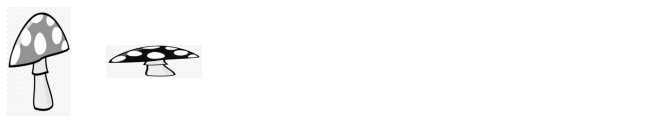

In [4]:
test_set = [sample_mushroom(1), sample_mushroom(0)]
show_mushrooms(test_set, 6, False)

## 1.2 Machines and Learning

How do we get computer programs to learn the difference between poisonous and edible mushrooms?  Because algorithms can't work with physical mushrooms, the first task is to encode the instances in a way that is suitable for computers.  That's done by coming up with a list of **features** or **attributes**, which are measurable properties of mushrooms that might be relevant to the classification problem, and recording the values of the features for each mushroom.  The result is called a **feature vector** or **attribute vector**.  The training and test sets above both have this form, encoded as Python dictionaries in the underlying code.  The two-instance test set is shown below.  

In [5]:
test_set

[{'label': 'edible',
  'height': 0.8432826805880729,
  'width': 0.49461525819113794,
  'color': 0.2549390220818172},
 {'label': 'poisonous',
  'height': 0.34331821544709473,
  'width': 0.9889973082045342,
  'color': -0.2666569791558412}]

There are entries in the dictionary for the true class label and the features discussed earlier: color, width, and height.  Note that the class of the first mushroom is edible and the class of the second is poisonous, as we suspected.  There are many other features of real mushrooms that might be relevant and measurable, such as their weight and smell.  There are even more features that could be measured but that are probably not relevant, such as the day of the week on which the mushrooms were gathered, or the color of the shoes you wore that day.  In general, choosing good features is important and an art rather than a science, though some machine learning algorithms can discover useful features themselves.

The code that generates the mushrooms visualized above produces colors in $[-0.5, 0.5]$ with values near $-0.5$ corresponding to dark caps and values near $0.5$ to light caps.  Widths and heights are both in $[0.25, 1.0]$ with smaller values being narrow and short, and larger values being wide and tall.  Given this encoding, the training set is shown as a table below, which is amenable to algorithmic processing.

In [6]:
df = pd.DataFrame(training_set)
df = df[['color', 'width', 'height', 'label']]
df

,color,width,height,label
0,-0.311688,0.358501,0.936567,edible
1,-0.265158,0.398325,0.805205,edible
2,-0.319424,0.337982,0.871713,edible
3,0.488963,0.447217,0.843613,edible
4,-0.113816,0.329731,0.970511,edible
5,0.084781,0.473324,0.801683,edible
6,-0.472327,0.817906,0.468387,poisonous
7,0.275378,0.797720,0.454339,poisonous
8,-0.004015,0.911085,0.455177,poisonous
9,0.046832,0.775865,0.395918,poisonous


It's common to denote instances as $(x, y)$ pairs, where $x$ is the attribute vector and $y$ is the label.  Using this notation, the first instance above is:

$$([-0.311688, 0.358501, 0.936567], {\tt edible})$$

That instance has three features, whose values are given as an ordered list, and its label is ${\tt edible}$.  The order of the features in the list is unimportant, as long as it is consistent across instances.  The $(x, y)$ notation is suggestive of function inputs ($x$) and outputs ($y$), i.e., $f(x) = y$.  That's because the machine learning problem in the context of classification can be stated as follows:

> Given a training set, find a function $f$ that maps from feature vectors to class labels so that $f$ produces the correct class labels for instances that are not in the training set.

In terms of our thought experiment, the goal is to use the training set in the table above to find a function $f$ such that when we gather new mushrooms, measure their color, width, and height, and encode them as a feature vector $x$, the output of $f(x)$ will yield exactly the same result (poisonous or edible) as the goat test.  Said differently, the goal is to find a function that **generalizes** from the training set to new instances.  In this context, the function is called a **classifier** because it outputs a class label.  More generally, the output of a machine learning algorithm is called a **model**.

Two questions about the framing of the classification problem given above immediately come to mind:
* What does $f$ look like?
* How do we use the training set to find a good $f$?

Much of the remainder of this book will deal with answering these two questions.  Different learning problems and algorithms require different forms of $f$, and even for the same form of $f$ there can be many ways of (learning algorithms for) finding a "good" one.  Next we'll briefly explore these two questions in a (highly) simplified way using the mushroom training set.

The plot below shows each mushroom as a point on the number line based on its width.  Edible mushrooms are green plus shapes and poisonous mushrooms are red circle shapes.  It's immediately obvious that edible mushrooms are narrower than poisonous ones.

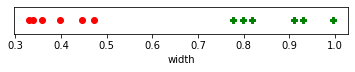

In [7]:
plot_mushroom_features(df, 'width')

In fact, it looks like a simple rule would work to help choose edible mushrooms.

<code>
if width < 0.6 then
  label = edible
else 
  label = poisonous
</code>

The width of every edible mushroom in the training set is less than 0.6, and the width of every poisonous mushroom is greater than 0.6. If this rule is applied to the training set it is 100% accurate. That is, the label output by the rule given a mushroom's width will always match the true label of that mushroom found in the training set. While this may seem like the optimal outcome, recall that what we really want is to generalize, to be accurate on new mushrooms. It's possible to be 100% accurate on the training set but make lots of mistakes on new instances, resulting in sick customers at the restaurant. There will be much more to say about this in later chapters.

So one answer to the question of what $f$ looks like is that it could be a  rule.  If there are two classes, $c_1$ and $c_2$, and $x_i$ denotes the value of the $i^{th}$ feature in feature vector $x$, the generic rule is:

<code>if <i>x</i><sub>i</sub> <|> &theta; then
  label = <i>c</i><sub>1</sub>
else 
  label = <i>c</i><sub>2</sub>
</code>

Three pieces of information are needed to operationalize this rule:
* The feature to test ($x_i$)
* The threshold to which the feature's value is compared ($\theta$)
* Whether that comparison is $<$ or $>$, i.e., whether $c_1$ is to the left or the right of the threshold value 

For the mushroom dataset, $c_1 = {\tt edible}$ and $c_2 = poisonous$, and color, width, and height are features 1, 2, and 3 respectively (see the table above).  Given the plot below based on mushroom heights, a rule that  predicts ${\tt edible}$ if $x_3 > 0.6$ would also be 100% accurate on the training set. 

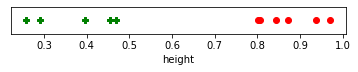

In [8]:
plot_mushroom_features(df, 'height')

Finally, the next plot shows mushrooms arranged by their color and suggests that there is no threshold on color that would yield a classifier that is 100% accurate on the training data.  No matter what threshold is chosen, one side or the other has a mixture of both edible and poisonous mushrooms. 

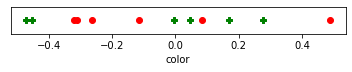

In [9]:
plot_mushroom_features(df, 'color')

Recall that there were two questions posed above.  The first was: What does $f$ look like?  To which one answer is a rule that applies a threshold to a single feature.  The second questions was: How do we find a good $f$?  A simple approach, which will make an appearance in the chapter on _decision trees_, is to loop over each feature and sort the instances by the value of the current feature.  For each pair of adjancent points in sorted order, let $\theta$ be their average.  That is, assume the threshold sits halfway between the two points.  Because the features are real numbers, there are infinitely many possible thresholds.  Focusing on thresholds that sit halfway between adjacent values in the training set is a heuristic to cut down on the number thresholds considered, and it works pretty well.  Next, compute the accuracy of the rule on the training set if $c_1$ is to the left of the threshold and $c_2$ is to the right (i.e., the comparison operator is $<$), then swap sides and compute accuracy again (i.e., the comparison operator is $>$).  This is essentially a generate-and-test algorithm that looks at all possible combinations of rule parameters, i.e., features, comparison operators, and thresholds (using the heuristic above to focus on promising candidates).  The combination that yields the highest accuracy on the training data (with ties broken by random choice) is the function (rule) output by the learning algorithm.  

The plots below show the result of running the generate-and-test algorithm on the mushroom training set.  For each combination of feature and threshold, the dataset is shown in the normal manner, but with a vertical black line indicating the location of the threshold.  Below that is the corresponding rule and its accuracy on the training set.  Only the rule with the best choice of comparison operator for that feature and threshold is shown.  Note that the best rule for the ${\tt color}$ feature is 67% accurate.  However, the best rules for ${\tt width}$ and ${\tt height}$ are 100% accurate with thresholds at 0.62 and 0.64 respectively.  Without too much effort, we've created an algorithm that yields results very similar to those obtained by visual inspection.  Indeed, it seems that in some cases it is not too hard to get machines to learn.

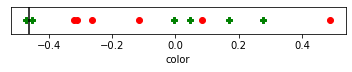

IF color > -0.46 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 58.33


<hr style="height:3px;color:black;" />

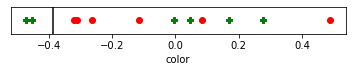

IF color > -0.39 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 66.67


<hr style="height:3px;color:black;" />

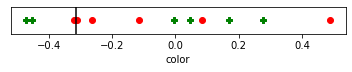

IF color > -0.32 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 58.33


<hr style="height:3px;color:black;" />

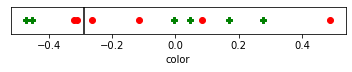

IF color < -0.29 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 50.00


<hr style="height:3px;color:black;" />

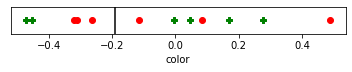

IF color < -0.19 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 58.33


<hr style="height:3px;color:black;" />

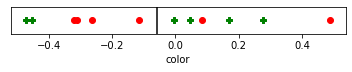

IF color < -0.06 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 66.67


<hr style="height:3px;color:black;" />

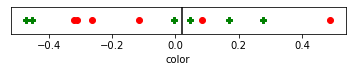

IF color < 0.02 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 58.33


<hr style="height:3px;color:black;" />

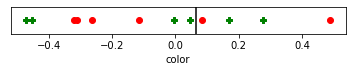

IF color < 0.07 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 50.00


<hr style="height:3px;color:black;" />

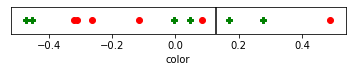

IF color < 0.13 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 58.33


<hr style="height:3px;color:black;" />

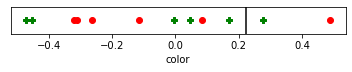

IF color < 0.22 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 50.00


<hr style="height:3px;color:black;" />

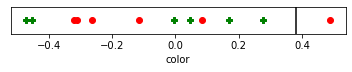

IF color > 0.38 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 58.33


<hr style="height:3px;color:black;" />

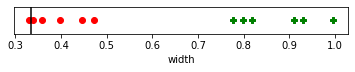

IF width < 0.33 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 58.33


<hr style="height:3px;color:black;" />

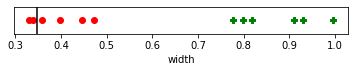

IF width < 0.35 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 66.67


<hr style="height:3px;color:black;" />

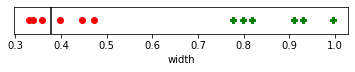

IF width < 0.38 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 75.00


<hr style="height:3px;color:black;" />

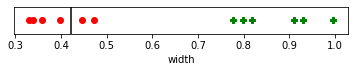

IF width < 0.42 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 83.33


<hr style="height:3px;color:black;" />

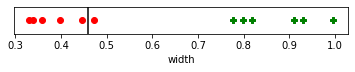

IF width < 0.46 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 91.67


<hr style="height:3px;color:black;" />

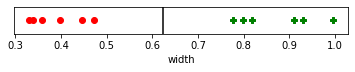

IF width < 0.62 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 100.00


<hr style="height:3px;color:black;" />

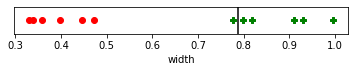

IF width < 0.79 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 91.67


<hr style="height:3px;color:black;" />

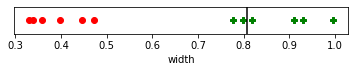

IF width < 0.81 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 83.33


<hr style="height:3px;color:black;" />

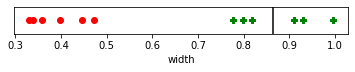

IF width < 0.86 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 75.00


<hr style="height:3px;color:black;" />

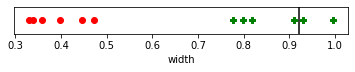

IF width < 0.92 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 66.67


<hr style="height:3px;color:black;" />

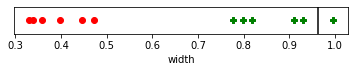

IF width < 0.96 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 58.33


<hr style="height:3px;color:black;" />

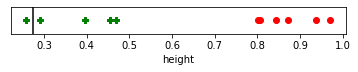

IF height > 0.27 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 58.33


<hr style="height:3px;color:black;" />

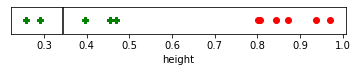

IF height > 0.34 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 66.67


<hr style="height:3px;color:black;" />

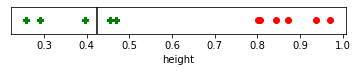

IF height > 0.43 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 75.00


<hr style="height:3px;color:black;" />

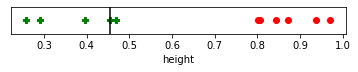

IF height > 0.45 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 83.33


<hr style="height:3px;color:black;" />

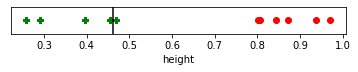

IF height > 0.46 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 91.67


<hr style="height:3px;color:black;" />

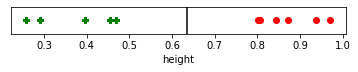

IF height > 0.64 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 100.00


<hr style="height:3px;color:black;" />

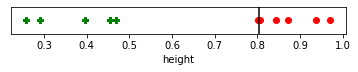

IF height > 0.80 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 91.67


<hr style="height:3px;color:black;" />

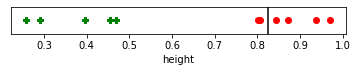

IF height > 0.82 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 83.33


<hr style="height:3px;color:black;" />

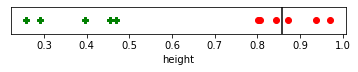

IF height > 0.86 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 75.00


<hr style="height:3px;color:black;" />

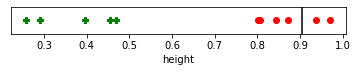

IF height > 0.90 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 66.67


<hr style="height:3px;color:black;" />

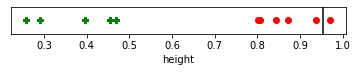

IF height > 0.95 THEN
	label = edible
ELSE
	label = poisonous
Training set accuracy = 58.33


<hr style="height:3px;color:black;" />

In [10]:
generate_and_test_mushroom_rules(df)

Quite a bit of machine learning research and practice follows the general approach above.  Given a problem that seems suitable for a machine learning solution, answer the following questions:
* What are the available inputs ($x$) and desired outputs ($y$)?
* What functional form $f$ is suitable for capturing the mapping from inputs to outputs?
* What measure of function quality best represents what is important in the application domain?
* What is the most efficient and effective way to search over the space of functions to find a "good" one according to the quality measure?

The remainder of this book explores many different ways of answering these questions, often by explaining various machine learning algorithms.  Beyond knowing what algorithms exist and how they work, it is important to develop judgement about when one algorithm might be better than another, to understand what is required to get the best possible performance from an algorithm in the context of a given application, and to know how to evaluate learned models in a way that fully and faithfully represents how they will perform once deployed.  That is, even after answering the questions above, a lot of work remains to solve the original problem well.  Each of these elements of the application of machine learning will be woven into the more formal discussion of the technical details of machine learning algorithms in subsequent chapters.

## 1.3 How to Use This Book

People learn in different ways.  My hope is that this book supports at least a few of those well, and does so better than a standard textbook in print can.  That said, it is possible to send this book to a printer, chapter by chapter, and have a perfectly good learning experience.  Yes, there is code embedded everywhere, but the default output of that code in each case represents a complete, self-contained example.  The only outputs that do not translate well to paper are the animations.  For example, the second chapter contains an animation of the Perceptron Learning Algorithm that highlights a geometric interpretation of what it does at each step.  The many plots, charts, and animations are there for visual learners.

The most impactful result of writing this text in a notebook is that all of the code-based examples are alive.  Some examples incorporate randomness and produce different results each time they are run.  Most examples take inputs so that it's possible to explore how changes in the inputs impact the outputs.  And the code for the various learning algorithms is not pseudo-code, it's Python code that actually runs.  That means that it's possible to modify the algorithms themselves to see what happens.  All of this trial-and-error exploration is meant to lead to deeper understanding of the underlying concepts.

Visual markers signal the start and end of sections where there are live examples to explore.  An example of such a section is shown below.

<div style="background-color:#FADBD8;">
<center>&lt;Explore&gt;</center></div>

The function below prints all integers between 1 and $n$.  Try different values of $n$ to see what happens.

In [11]:
def count(n):
    for i in range(n):
        print(i + 1)

In [12]:
count(3)

1
2
3


<div style="background-color:#FADBD8;">
<center>&lt;/Explore&gt;</center></div>

The &lt;Explore&gt;&lt;/Explore&gt; "tags" in the colored bars delimit the live example, including explanations, the code itself, any default output, and ideas about things to try.  None of the code in this book is industrial strength.  It was written to be clear, not bulletproof.  The example above produces no output if its argument $n$ is a negative number.  It generates an exception if $n$ is a floating point number.  It will run for a very long time if $n = 2^{50}$.  But that's OK.  If an example fails to terminate, just click the stop button in the notebook to iterrupt the kernel.  If something unexpected or unwanted happens when changing parameters, just try different values that are closer to what was there originally until the results make more sense.  If experiments with edits to an algorithm lead to code that is irretrievably broken, download the notebook again and start over.

There's clearly an assumption that readers will have some familiarity with the Python programming language.  Even so, the algorithm implementations are written with the tradeoff between compactness and clarity in mind.  When there was an option of writing the code in an elegant way that may confuse those with less Python experience, the less elegant but more understandable implementation was chosen.  Finally, there is almost always some quick explanation of any tricky bits of Python code, though  what's considered "tricky" varies a lot from person to person.

A number of tools in the standard Python machine learning stack make frequent appearances.  They include pandas (the Python Data Analysis Library) for dealing with data, the Matplotlib plotting library for generating everything from scatter plots to animations of the inner workings of algorithms, and scikit-learn for industrial strength implementations of a stunning array of machine learning algorithms.  The easiest way to get all of the packages needed for this book is to get the Anaconda package manager and the default packages that it installs.

**For the animations to work, you'll need Matplotlib 2.1.0 or higher.**

## 1.4 Final Thoughts

The family tree of machine learning problems is big and growing fast.  This chapter touched briefly on supervised learning, where the input is a dataset of $(x, y)$ pairs.  There's also **unsupervised learning** that involves datasets with just $x$'s and no $y$'s.  For example, someone could ask you to sort a big box of mushrooms into distinct groups based on visual similarity.  You could form groups based on color (dark vs. light) or height (short vs. tall) or height and width (tall and thin vs. short and wide).  In the latter case the groups correspond to edible and poisonous mushroom because those two classes are associated with observable features that naturally divide into two groups, but you don't know that because there are no class labels in unsupervised learning.

There's also **semi-supervised learning** where you've got lots of $x$'s and a smaller number of $(x, y)$ pairs.  You may have many mushrooms (i.e., $x$'s), but it's expensive and a bit cruel to test mushrooms on goats, so the number of labeled instances (i.e., those with $y$'s) may be much smaller.  As we'll see, that large collection of unlabeled mushrooms can be used to learn better classifiers given the few that are labeled.

In contrast, **reinforcement learning** doesn't care about $x$'s or $y$'s.  Rather, a reinforcement learner's goal is to choose actions that maximize reward.  Think of a mouse in a maze with cheese.  It learns by exploring the maze over and over to choose whether to turn left or right at each intersection to get to the reward (the cheese) as quickly as possible.  Reinforcement learning systems have achieved world-class performance in games like backgammon and go by playing millions of games against themselves.

This could go on and on.  But rather than building out the family tree here, we'll do it incrementally as each chapter introduces new problems, concepts, and algorithms.

## 1.5 Footnotes and References

<sup id="fn1">1</sup> This is based loosely on a trip I made in 1996 to Bari, Italy to present a paper at the 13th International Conference on Machine Learning.  I traveled from Bari to Aviano to visit a good friend from my days as an undergraduate.  He owned and cooked at a restaurant, where we ate both goat and mushrooms.

<p>

<div id="Mitchell1997">(Mitchell, 1997) Machine Learning, Tom Mitchell, McGraw Hill, 1997.</div>